# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

ames = pd.read_csv('ames.csv',index_col=None,encoding='latin-1')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Id               1460
MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHa

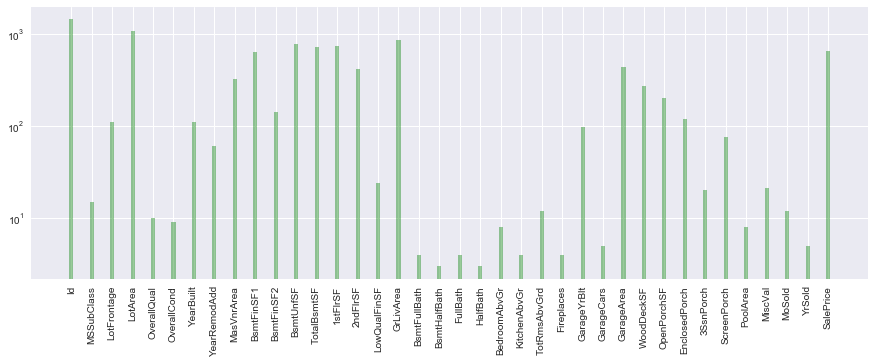

In [2]:
ames_filtered = ames.loc[:, ames.dtypes != 'object']

print(ames_filtered.columns)
print(ames_filtered.nunique())

fig, ax = plt.subplots(1,1,figsize = (15, 5)) 
plt.bar(ames_filtered.columns,ames_filtered.nunique(),color='green',alpha=0.4,width=0.2)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [3]:
# Your code here
ames_preprocessed = ames.loc[:, (ames.dtypes != 'object') & (ames.nunique() > 10)]
print(ames_preprocessed.shape)
print(ames_preprocessed.shape[1] // 3)
ames_preprocessed.head()

(1460, 26)
8


,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,...,2003.0,548,0,61,0,0,0,0,2,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,...,1976.0,460,298,0,0,0,0,0,5,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,...,2001.0,608,0,42,0,0,0,0,9,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,...,1998.0,642,0,35,272,0,0,0,2,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,...,2000.0,836,192,84,0,0,0,0,12,250000


In [4]:
print(len(ames_preprocessed.columns))
ames_preprocessed.columns

26


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

MSSubClass AxesSubplot(0.125,0.772143;0.168478x0.107857)
LotFrontage AxesSubplot(0.327174,0.772143;0.168478x0.107857)
LotArea AxesSubplot(0.529348,0.772143;0.168478x0.107857)
YearBuilt AxesSubplot(0.731522,0.772143;0.168478x0.107857)
YearRemodAdd AxesSubplot(0.125,0.642714;0.168478x0.107857)
MasVnrArea AxesSubplot(0.327174,0.642714;0.168478x0.107857)
BsmtFinSF1 AxesSubplot(0.529348,0.642714;0.168478x0.107857)
BsmtFinSF2 AxesSubplot(0.731522,0.642714;0.168478x0.107857)
BsmtUnfSF AxesSubplot(0.125,0.513286;0.168478x0.107857)
TotalBsmtSF AxesSubplot(0.327174,0.513286;0.168478x0.107857)
1stFlrSF AxesSubplot(0.529348,0.513286;0.168478x0.107857)
2ndFlrSF AxesSubplot(0.731522,0.513286;0.168478x0.107857)
LowQualFinSF AxesSubplot(0.125,0.383857;0.168478x0.107857)
GrLivArea AxesSubplot(0.327174,0.383857;0.168478x0.107857)
TotRmsAbvGrd AxesSubplot(0.529348,0.383857;0.168478x0.107857)
GarageYrBlt AxesSubplot(0.731522,0.383857;0.168478x0.107857)
GarageArea AxesSubplot(0.125,0.254429;0.168478x0.1078

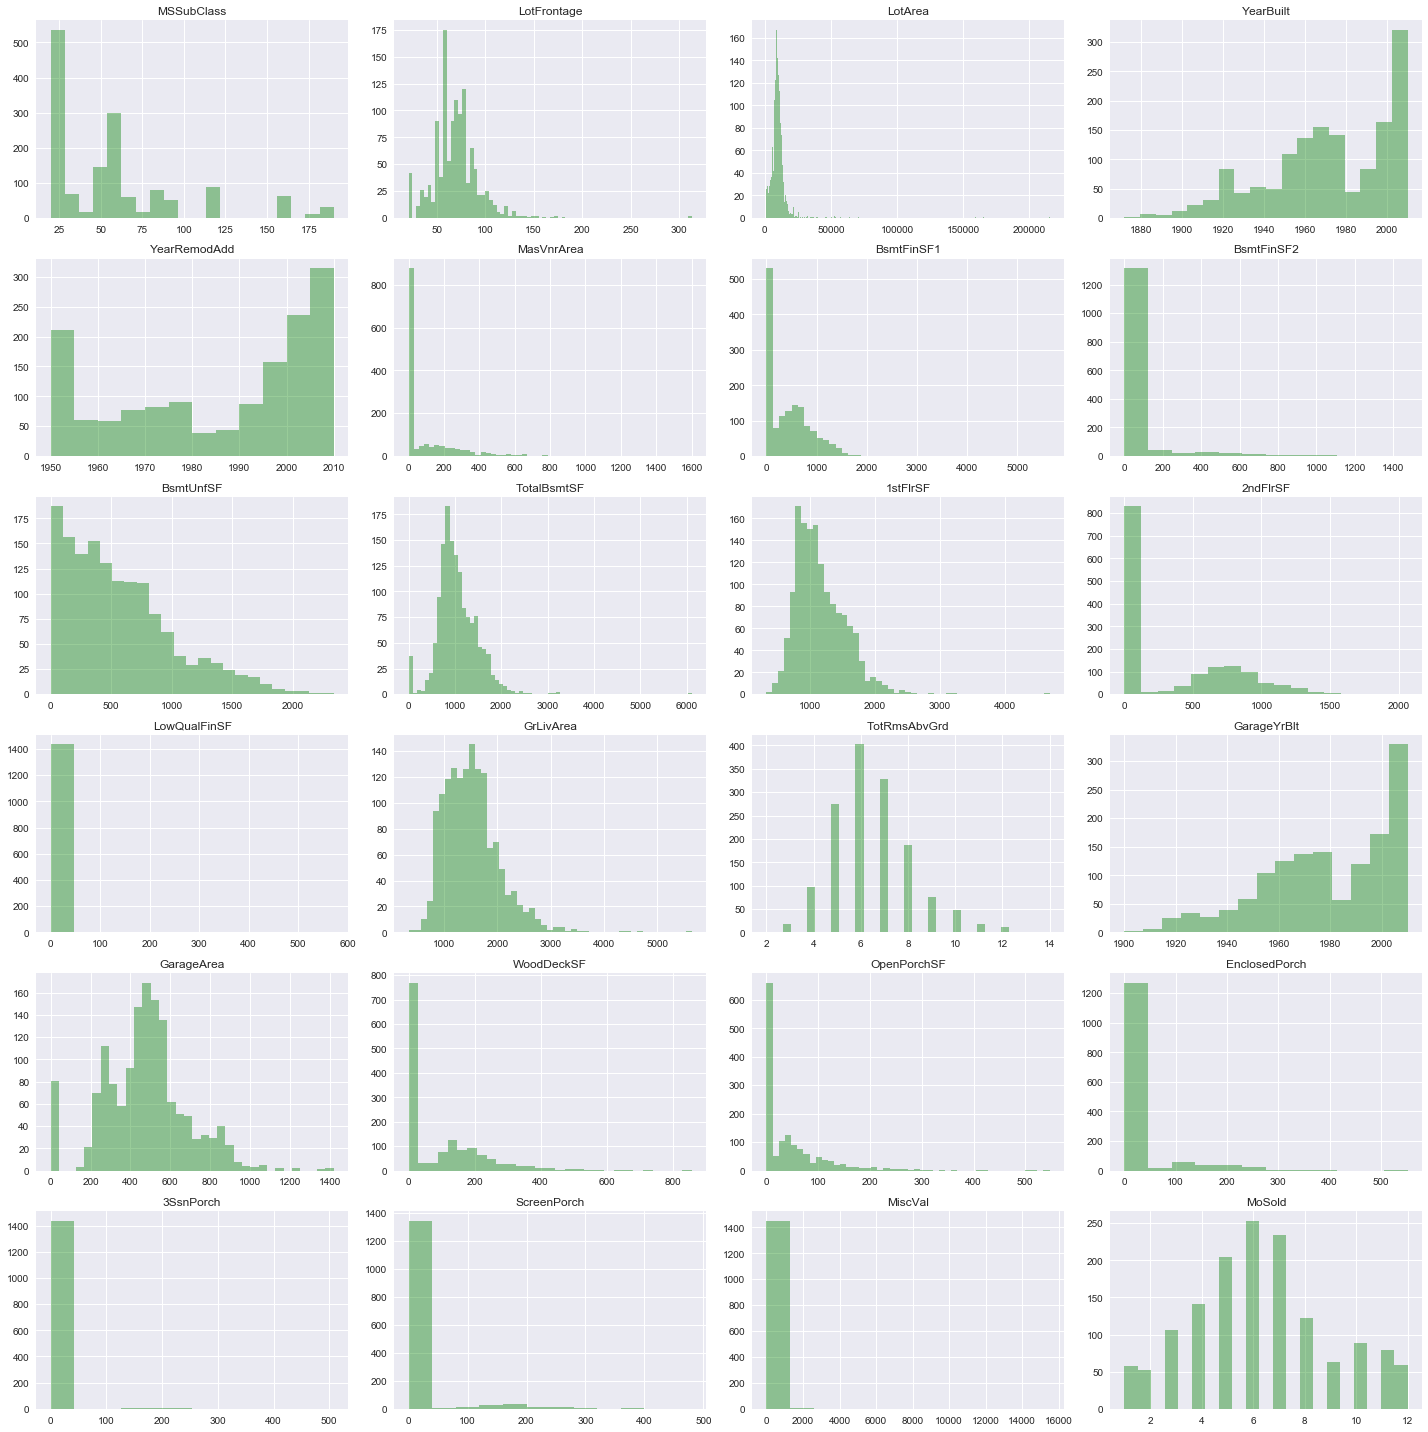

In [5]:
fig2, axes = plt.subplots(nrows=ames_preprocessed.shape[1] // 4, ncols=4, figsize=(20,20))
categorial = list(col for col in ames_preprocessed.columns if col != 'Id')
for xcol, ax in zip(categorial, axes.flatten()):
    print(xcol,ax)
    #ames_preprocessed[xcol].dropna().plot(kind='hist', ax=ax, alpha=0.4, color='green')
    ax.hist(ames_preprocessed[xcol].dropna(), bins='auto', alpha=0.4, color='green')
    ax.set_title(xcol)
    
fig2.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [6]:
# Select non zero-inflated continuous features as ames_cont
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = ames_preprocessed.loc[:, continuous]
ames_cont.head()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,SalePrice
0,65.0,8450,2003,856,1710,208500
1,80.0,9600,1976,1262,1262,181500
2,68.0,11250,2001,920,1786,223500
3,60.0,9550,1915,961,1717,140000
4,84.0,14260,2000,1145,2198,250000


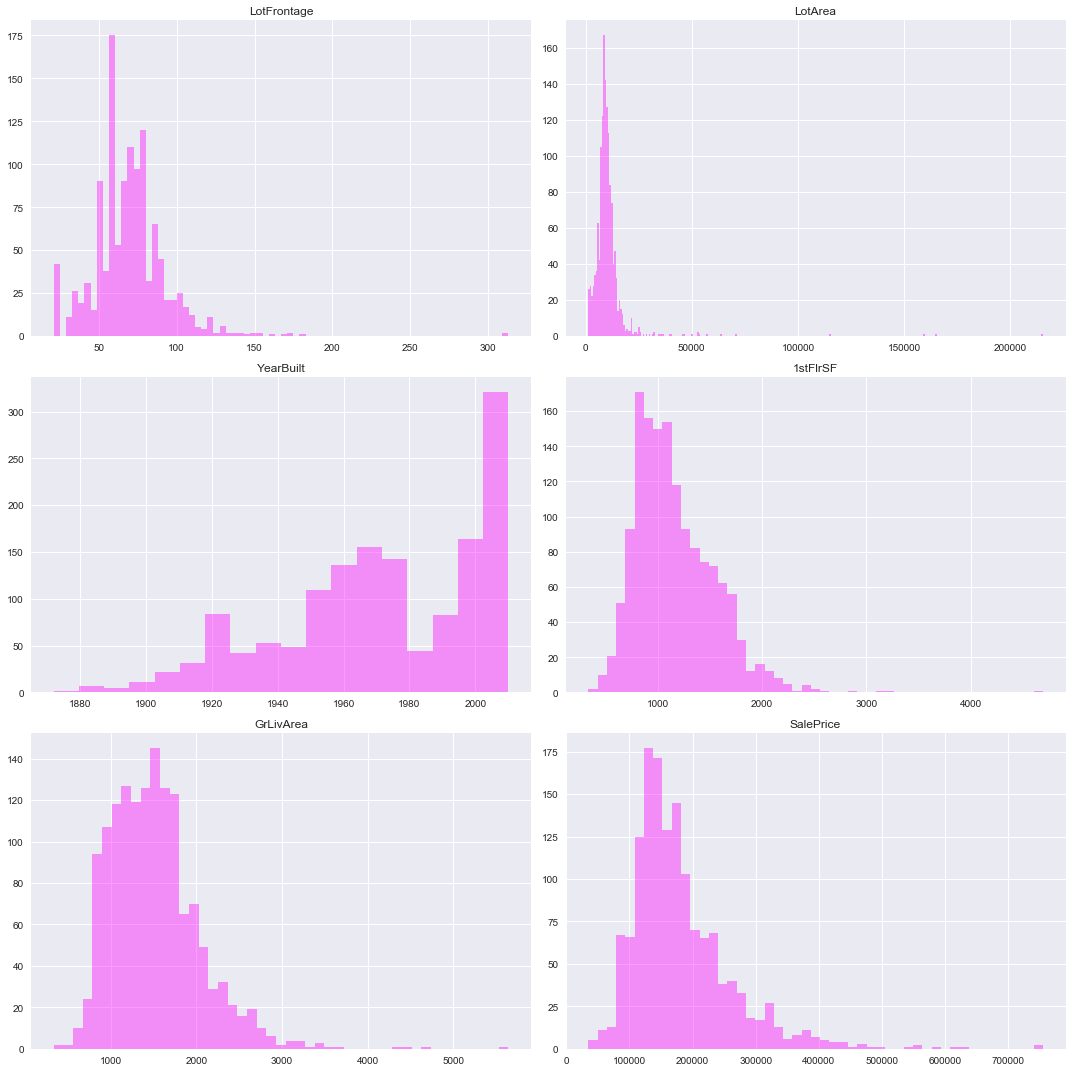

In [8]:
fig3, axes = plt.subplots(nrows=ames_cont.shape[1] // 2, ncols=2, figsize=(15,15))
for xcol, ax in zip(continuous, axes.flatten()):
    ax.hist(ames_cont[xcol], bins='auto', alpha=0.4, color='magenta')
    ax.set_title(xcol)

fig3.tight_layout()

## Perform log transformations for the variables where it makes sense

In [9]:
# Your code here
ames_cont_log = pd.DataFrame([])
continuous_log = map(lambda x: np.log(x), continuous)
for col in ames_cont.columns:
    ames_cont[col+'_log'] = ames_cont[col].map(lambda x: np.log(x))
    ames_cont_log[col+'_log'] = ames_cont[col].map(lambda x: np.log(x))
ames_cont.head()

,LotFrontage,LotArea,YearBuilt,1stFlrSF,GrLivArea,SalePrice,LotFrontage_log,LotArea_log,YearBuilt_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,65.0,8450,2003,856,1710,208500,4.174387,9.041922,7.602401,6.752270,7.444249,12.247694
1,80.0,9600,1976,1262,1262,181500,4.382027,9.169518,7.588830,7.140453,7.140453,12.109011
2,68.0,11250,2001,920,1786,223500,4.219508,9.328123,7.601402,6.824374,7.487734,12.317167
3,60.0,9550,1915,961,1717,140000,4.094345,9.164296,7.557473,6.867974,7.448334,11.849398
4,84.0,14260,2000,1145,2198,250000,4.430817,9.565214,7.600902,7.043160,7.695303,12.429216


In [10]:
ames_cont_log.head()

,LotFrontage_log,LotArea_log,YearBuilt_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,4.174387,9.041922,7.602401,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.588830,7.140453,7.140453,12.109011
2,4.219508,9.328123,7.601402,6.824374,7.487734,12.317167
3,4.094345,9.164296,7.557473,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.600902,7.043160,7.695303,12.429216


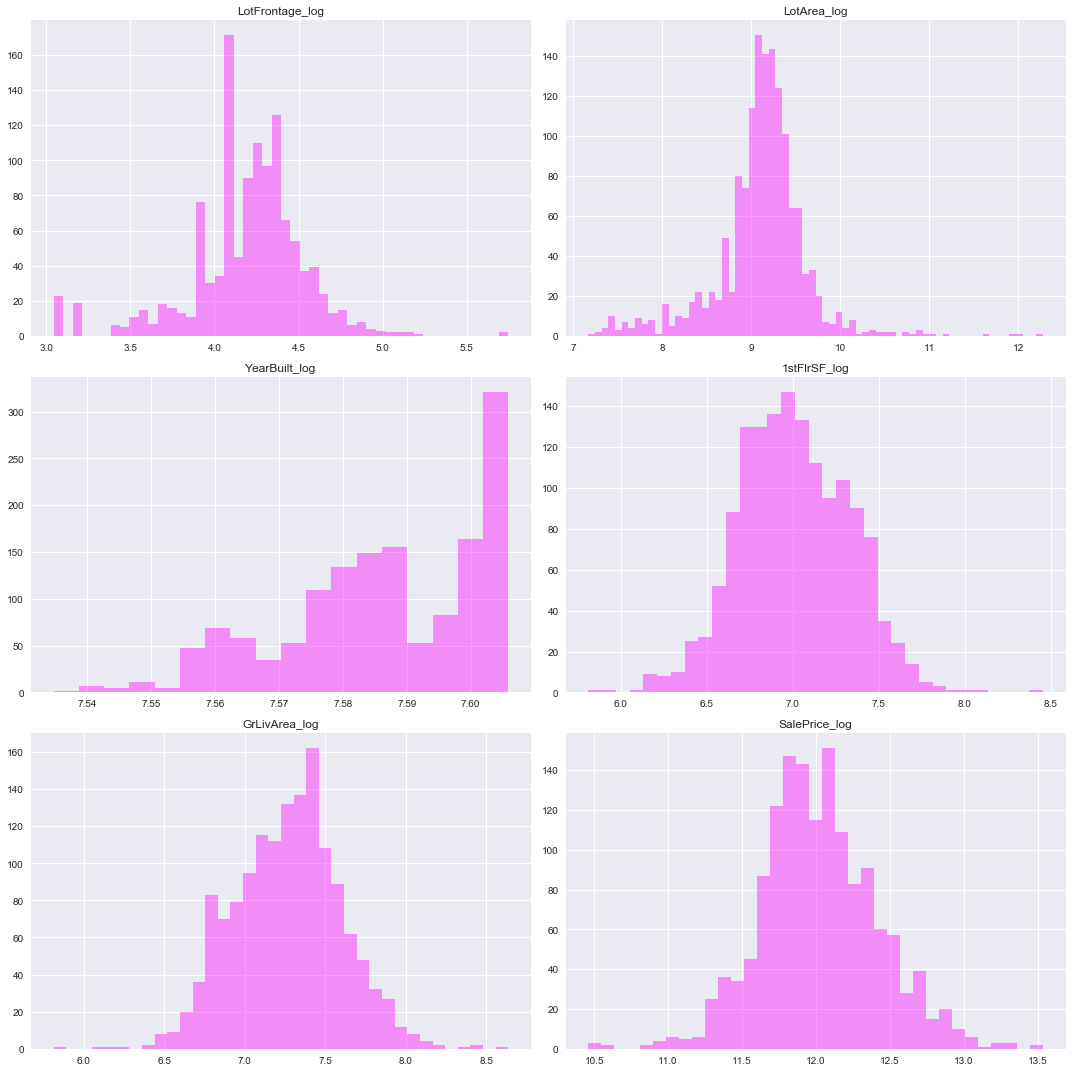

In [11]:
fig4, axes = plt.subplots(nrows=ames_cont_log.shape[1] // 2, ncols=2, figsize=(15,15))
for xcol, ax in zip(ames_cont_log.columns, axes.flatten()):
    ax.hist(ames_cont_log[xcol], bins='auto', alpha=0.4, color='magenta')
    ax.set_title(xcol)

fig4.tight_layout()

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [12]:
# Commentary:

# We decided not to include the zero inflated features anymore
# We decided to perform log transformations on the data, 
# except for "YearBuilt" where the logtransforms did not improve the skewness.

In [13]:
# Your code here
ames_cont_log_scaled = pd.DataFrame([])
ames_cont_log_scaled = (ames_cont_log - np.mean(ames_cont_log)) / np.std(ames_cont_log)
ames_cont_log_scaled.head()

,LotFrontage_log,LotArea_log,YearBuilt_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,-0.047243,-0.133231,1.045177,-0.803570,0.529260,0.560068
1,0.541518,0.113442,0.163448,0.418585,-0.381846,0.212764
2,0.080696,0.420061,0.980273,-0.576560,0.659675,0.734046
3,-0.274204,0.103347,-1.873795,-0.439287,0.541511,-0.437382
4,0.679863,0.878409,0.947796,0.112267,1.282191,1.014651


In [14]:
continuous_log_scaled = list(f'{col}_scaled' for col in ames_cont_log.columns)
ames_cont_log_scaled.columns = continuous_log_scaled
ames_cont_log_scaled.head()

,LotFrontage_log_scaled,LotArea_log_scaled,YearBuilt_log_scaled,1stFlrSF_log_scaled,GrLivArea_log_scaled,SalePrice_log_scaled
0,-0.047243,-0.133231,1.045177,-0.803570,0.529260,0.560068
1,0.541518,0.113442,0.163448,0.418585,-0.381846,0.212764
2,0.080696,0.420061,0.980273,-0.576560,0.659675,0.734046
3,-0.274204,0.103347,-1.873795,-0.439287,0.541511,-0.437382
4,0.679863,0.878409,0.947796,0.112267,1.282191,1.014651


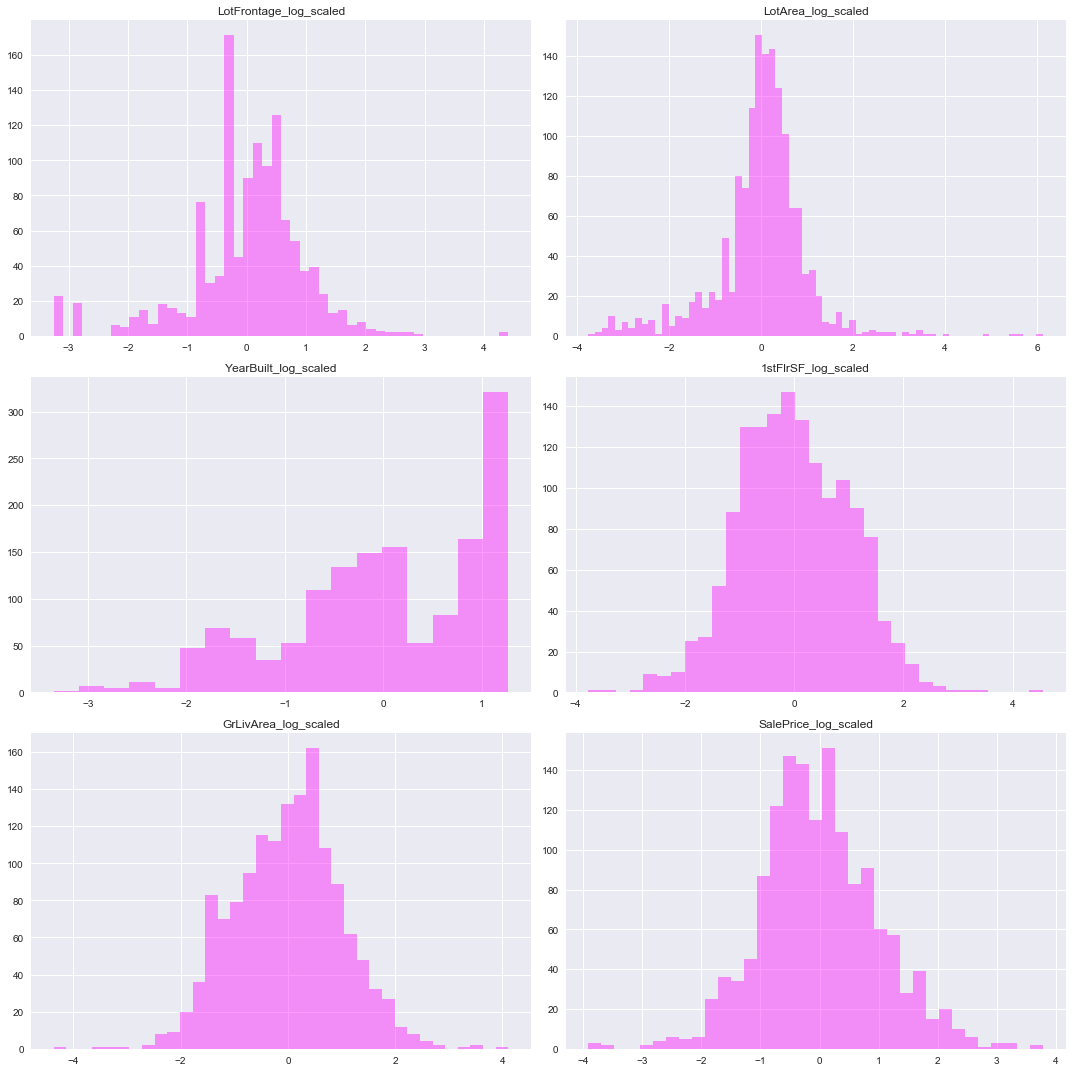

In [15]:
fig5, axes = plt.subplots(nrows=ames_cont_log_scaled.shape[1] // 2, ncols=2, figsize=(15,15))
for xcol, ax in zip(ames_cont_log_scaled.columns, axes.flatten()):
    ax.hist(ames_cont_log_scaled[xcol], bins='auto', alpha=0.4, color='magenta')
    ax.set_title(xcol)

fig5.tight_layout()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!